In [ ]:
#!pip install matplotlib

In [ ]:
import cv2
import matplotlib.pylab as plt

# Verify that OpenCV is built with Gstreamer support

In [ ]:
print(cv2.getBuildInformation())

# Magic of Appsink element. (Use Gstreamer Pipeline to read any video source)

In [ ]:

vc = cv2.VideoCapture('videotestsrc ! video/x-raw,framerate=20/1 ! videoconvert ! appsink', cv2.CAP_GSTREAMER)
vc.isOpened()
status, image = vc.read()
plt.imshow(image[:,:,::-1])
vc.release()

In [ ]:

vc = cv2.VideoCapture("""
videotestsrc ! video/x-raw,framerate=20/1 
! videoscale ! video/x-raw,width=1920,height=1080  
! videoconvert 
! appsink""", cv2.CAP_GSTREAMER)
vc.isOpened()
status, image = vc.read()
plt.imshow(image[:,:,::-1])
vc.release()

# Read remote video

In [ ]:
vc = cv2.VideoCapture("""
uridecodebin uri=https://gstreamer.freedesktop.org/data/media/sintel_trailer-480p.webm 
! queue 
! videoscale 
! video/x-raw,width=320,height=200 
! videoconvert 
! appsink
""", cv2.CAP_GSTREAMER)

vc.isOpened()
status, image = vc.read()

for i in range(100):
    status, image = vc.read()
    
plt.imshow(image[:,:,::-1])

# Read Industrial cameras (Genicam, USB3, GigabitEthernet, Basler)

## Aravis (generic driver, supports multiple cameras)
https://github.com/AravisProject/aravis

## Basler
https://github.com/basler/gst-plugin-pylon

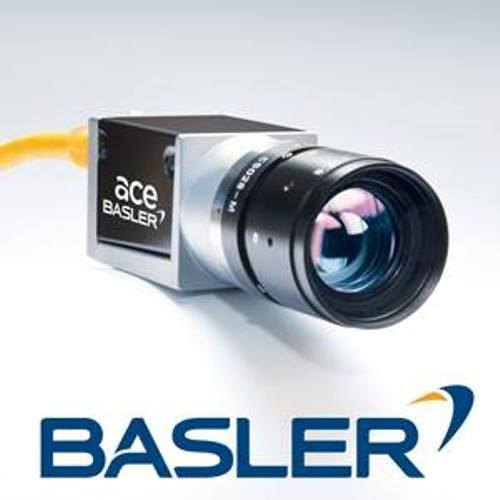

# Watching YouTube with GStreamer + OpenCV

In [ ]:
#!pip install git+https://github.com/ytdl-org/youtube-dl.git@master#egg=youtube_dl

In [ ]:
!youtube-dl --list-formats https://www.youtube.com/watch?v=uYPbbksJxIg

In [ ]:
!youtube-dl --format "best[ext=mp4]" --get-url https://www.youtube.com/watch?v=uYPbbksJxIg

In [ ]:
url = "https://rr1---sn-n4g-jqbek.googlevideo.com/videoplayback?expire=1691892576&ei=AOfXZOTmGM2xp-oP6bmU8AY&ip=77.134.205.153&id=o-AMHE1QRxYkgkNwZKXU6668WGrzpl6KA5q4Pk0XjC6amq&itag=22&source=youtube&requiressl=yes&mh=Rp&mm=31%2C26&mn=sn-n4g-jqbek%2Csn-h5q7knel&ms=au%2Conr&mv=m&mvi=1&pl=24&initcwndbps=953750&spc=UWF9f0eJ3Ect9XWAj3B-tucrbcoAaLl-3SG1vmNyLA&vprv=1&svpuc=1&mime=video%2Fmp4&ns=xNyAFqTm_2wkqiy_tXJnvTYP&cnr=14&ratebypass=yes&dur=186.665&lmt=1683536203945836&mt=1691870481&fvip=3&fexp=24007246%2C51000011&c=WEB&txp=5532434&n=vgs6zvCb-2bu2g&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cspc%2Cvprv%2Csvpuc%2Cmime%2Cns%2Ccnr%2Cratebypass%2Cdur%2Clmt&sig=AOq0QJ8wRAIgHS4N0retG_erYvRdwTVBlBE6653MHHnS61bk_WxLClYCIA0fTI27rmHbMMEI_ZKoPB_VtIIrkQSDxNrb2Y341_8P&lsparams=mh%2Cmm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl%2Cinitcwndbps&lsig=AG3C_xAwRQIgG8OIA-9_DnLkmXNnLCdIiYxDtH0WWOXyLAnfUNMP6pUCIQCf5eVChIXfdmgvecPOQIP9p1N5M138z7KF2q-t80u6jQ%3D%3D"

vc = cv2.VideoCapture(f"""
uridecodebin uri={url} 
! queue 
! videoscale ! video/x-raw,width=320,height=200 
! videoconvert 
! appsink""", cv2.CAP_GSTREAMER)


status, image = vc.read()

plt.imshow(image[:,:,::-1]) # first frame

In [ ]:
for i in range(13*25): # skip 100 frames
    status, image = vc.read()
    
plt.imshow(image[:,:,::-1])

In [ ]:
vc.release()

# [Bonus] Low FPS use-case. (Example: Parking occupation detection)

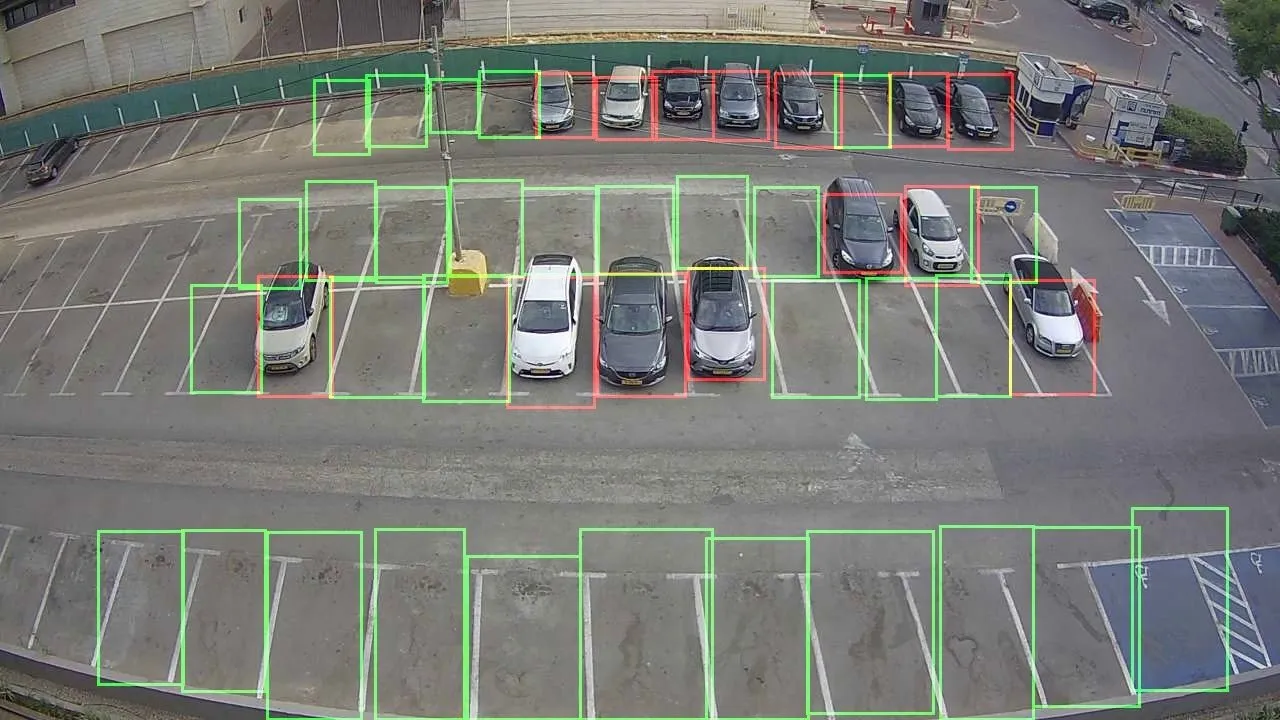

In [ ]:
import time

vc = cv2.VideoCapture('videotestsrc ! video/x-raw,framerate=1/5 ! videoconvert ! appsink', cv2.CAP_GSTREAMER)

while True:
    start_t = time.time()
    status, image = vc.read()
    if not status:
        break
    end_t = time.time()
    print(f"time: {end_t-start_t}")

vc.release()